### Student Information
Name: Kanokphan Thananchai (柯諾潘)

Student ID: 112065431

GitHub ID: hedgehog-menn

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

In [1]:
### Begin Assignment Here

# Part 1 - Take Home Exercises

## Exercise 2
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [2]:
# Prerequisites from the lab
from sklearn.datasets import fetch_20newsgroups

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

import pandas as pd
# my functions
import sys
sys.path.append('..') # Since we are inside folder, but we want to use the lib outside
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
# add category to the dataframe
X['category'] = twenty_train.target
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))


In [3]:
## Answer here ##
X[:50].query('category == 2')


,text,category,category_name
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med
16,"From: texx@ossi.com (Robert ""Texx"" Woodworth) ...",2,sci.med
28,From: rind@enterprise.bih.harvard.edu (David R...,2,sci.med
29,From: spp@zabriskie.berkeley.edu (Steve Pope) ...,2,sci.med
30,From: vgwlu@dunsell.calgary.chevron.com (greg ...,2,sci.med
32,From: doyle+@pitt.edu (Howard R Doyle) Subject...,2,sci.med
34,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
44,From: rgasch@nl.oracle.com (Robert Gasch) Subj...,2,sci.med


In [4]:
## end of the answer ##

---

## Exercise 5
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [5]:
# Prerequisites from the lab
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [6]:
# Prerequisites from the lab
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [7]:
## Answer here ##

`isnull()` is to detect missing values.

id: **A**, **E**
> Return a boolean same-sized object indicating if the values are NA.
NA values, such as `None` or `numpy.NaN`, gets mapped to True values. Everything else gets mapped to False values.

id: **B**
> There is no `'missing_example'` key, so it's a NA/missing value.

id: **C**, **D**
> They both are strings with (text) values, so they are not the NA/missing values

id: **F**
> Characters such as empty strings `''` or `numpy.inf` are not considered NA values (unless you set `pandas.options.mode.use_inf_as_na = True`).

In [8]:
## end of the answer ##

***

## Exercise 6
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [9]:
# Prerequisites from the lab
X_sample = X.sample(n=1000,random_state=42) #random state

In [10]:
X

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
...,...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med


In [11]:
X_sample

,text,category,category_name
561,From: ray@engr.LaTech.edu (Bill Ray) Subject: ...,2,sci.med
440,From: jkellett@netcom.com (Joe Kellett) Subjec...,3,soc.religion.christian
1513,From: noring@netcom.com (Jon Noring) Subject: ...,2,sci.med
1360,From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...,3,soc.religion.christian
259,From: keith@cco.caltech.edu (Keith Allan Schne...,0,alt.atheism
...,...,...,...
1316,From: salaris@niblick.ecn.purdue.edu (Rrrrrrrr...,3,soc.religion.christian
592,From: sandvik@newton.apple.com (Kent Sandvik) ...,0,alt.atheism
1965,From: uad1126@tdc.dircon.co.uk (Robert Palmer)...,3,soc.religion.christian
363,From: mdpyssc@fs1.mcc.ac.uk (Sue Cunningham) S...,1,comp.graphics


In [12]:
## Answer here ##

1. X_sample will not be the same in each time that running code. (It's `random`)
2. X_sample's row size != X's row size (1000 v.s. 2257)
  User input n which n = Number of items from axis to return so X_sample have row size = 1000
3. The index of X_sample is not order because it will random 1000 row out row data from X dataframe (2257)

In [13]:
## end of the answer ##

---

## Exersice 8
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

![alt txt](https://i.imgur.com/9eO431H.png)

In [14]:
# Prerequisites from the lab
import matplotlib.pyplot as plt

<Axes: title={'center': 'Category distribution'}>

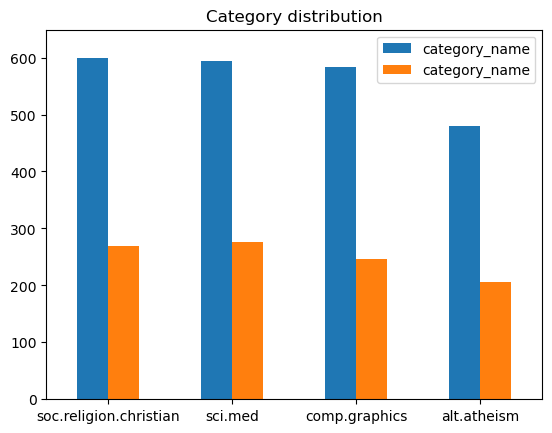

In [15]:
## Answer here ##

# Comebine both DataFrames into only one
new_df = pd.concat([X.category_name.value_counts(), X_sample.category_name.value_counts()], axis=1)
# Name label of the coulums
new_df.columns = ['category_name', 'category_name']
new_df_upper_bound = max(X.category_name.value_counts() + 50)
new_df.plot(kind = 'bar',
            title = 'Category distribution',
            ylim = [0, new_df_upper_bound],
            xlabel='', # Remove default X's label
            rot = 0)

In [16]:
## end of the answer ##

---

## Exersice 10
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [17]:
# Prerequisites from the lab
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix

In [18]:
## Answer here ##
X_array = X_counts[4, 0:100].toarray()
Y = np.where(X_array == 1)

for i in range(len(Y)):
    print(count_vect.get_feature_names_out()[Y[i][1]])

00
01


The another 1 value that represent from the vocabulary is `01`

In [19]:
## end of the answer ##

---

## Exercise 11
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

,term_00,term_000,term_0000,term_0000001200,term_000005102000,term_0001,term_000100255pixel,term_00014,term_000406,term_0007,term_000usd,term_0010,term_001004,term_0010580b,term_001125,term_001200201pixel,term_0014,term_001642,term_00196,term_002
doc_0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


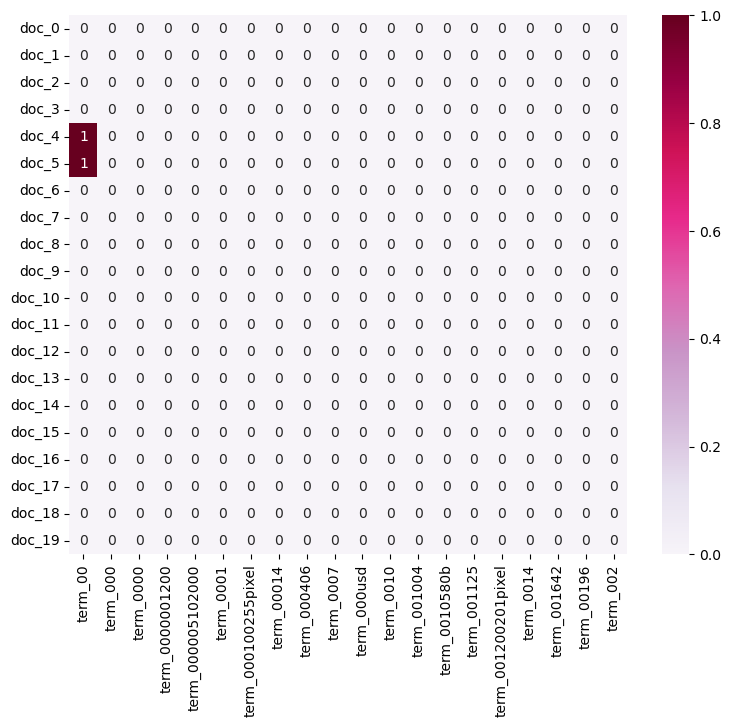

In [20]:
# Prerequisites from the lab
import seaborn as sns

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [21]:
## Answer here ##

To do this efficiently, I will compress the matrix using from scipy.sparse import csc_matrix. After we print out the compress matrix it will show the element that value is not in zero term.

In [22]:
from scipy.sparse import csc_matrix # compressed sparse row matrix

# Compress the X_counts[0:20, 0:20]
sparse_X = csc_matrix(X_counts[0:20, 0:20])     

# The answer after printout will show only the element's value != 0
print(sparse_X)                                 

  (4, 0)	1
  (5, 0)	1


In [23]:
# Get the rows and columns data from sparse_X with non-zero term.
row, col = sparse_X.nonzero()

row

array([4, 5], dtype=int32)

In [24]:
col

array([0, 0], dtype=int32)

In [25]:
# sparse_X still keeps the zero element but it was compressed by the csc_matrix
sparse_X

<20x20 sparse matrix of type '<class 'numpy.int64'>'
	with 2 stored elements in Compressed Sparse Column format>

Instead of keeping data with ***zero-term*** + ***non-zero-term***, We keep in Compressed Sparse when printout show only ***non-zero-term*** is more efficient.

Below is the plot using spy plot which will plot the sparsity pattern of a 2D array. It will visualize the non-zero value of the array. In addition, I also include the annotation in the plot which will show that which word is non-zero term.

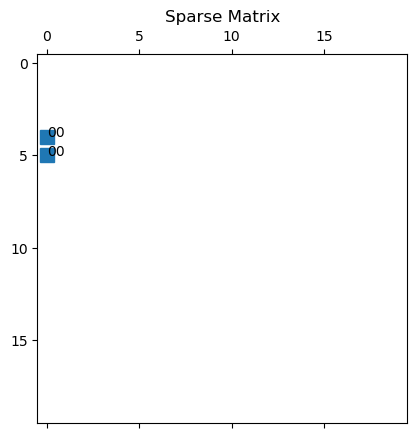

In [26]:
# spy() will plot the sparsity patter of a 2D array.
plt.spy(sparse_X)
plt.title('Sparse Matrix')

# This will annotate the word in spy-plot
for i in range(len(row)):
    plt.text(col[i], row[i], count_vect.get_feature_names_out()[col[i]])

In [27]:
## end of the answer ##

---

# Exercise 12
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [28]:
## Answer here ##

from sklearn.decomposition import PCA
# PCA reduce dimension from 2257 to 3
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
X_reduced.shape

(2257, 3)

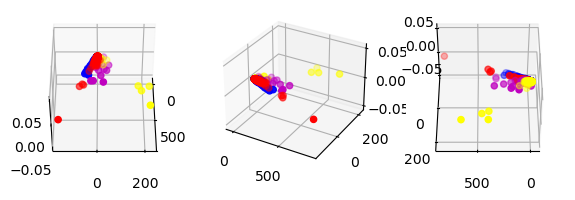

In [29]:
new_col = ['red', 'blue', 'yellow', 'm']

# plot
fig = plt.figure(figsize = (7,5))
# Create 3D plots
ax = fig.add_subplot(1,3,1, projection = '3d')
ax1 = fig.add_subplot(1,3,2, projection = '3d')
ax2 = fig.add_subplot(1,3,3, projection = '3d')

for c, category in zip(new_col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]

    ax.scatter(xs, ys, c = c)
    ax1.scatter(xs, ys, c = c)
    ax2.scatter(xs, ys, c = c)

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax1.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax2.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)

ax.view_init(45, 0)                                 # Rotate the view's angle of `ax` plot order.
                                                    # `ax1` plot order I use the default view's angle.
ax2.view_init(45, 90)                               # Rotate the view's angle of `ax2` plot order.

plt.show()

From above 3 graph, There are 2 groups that are outlier data

- 🟥 Red in alt.atheism category_name: 1 data
- 🟨 Yellow in comp.graphics category_name: 4 data

In [30]:
## end of the answer ##

---

# Exercise 13
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [31]:
# Prerequisites from the lab
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [32]:
## Answer here ##
import plotly.express as px

df_plotly = pd.DataFrame(count_vect.get_feature_names_out()[:300], columns = ['Term'])
df_plotly['Term_Freq'] = term_frequencies[:300]
df_plotly_fig = px.bar(df_plotly, x='Term', y='Term_Freq')
df_plotly_fig.show()

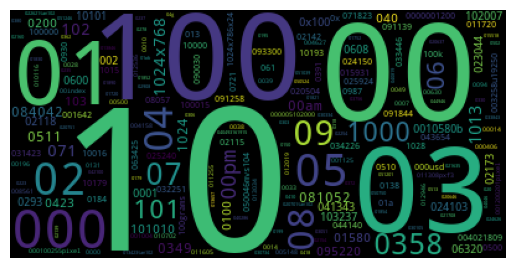

In [33]:
# Using Wordcloud, need to install new packege into the environment
from wordcloud import WordCloud

dict_word = {}
new_count = 0

# Append data in dictionary which key = term, values = frequency.
for i in count_vect.get_feature_names_out()[:300]:
    dict_word[i] = term_frequencies.tolist()[new_count]
    new_count = new_count + 1

wordcloud = WordCloud(relative_scaling=0.5, normalize_plurals=False).generate_from_frequencies(dict_word)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [34]:
## end of the answer ##

---

# Exercise 14
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise.

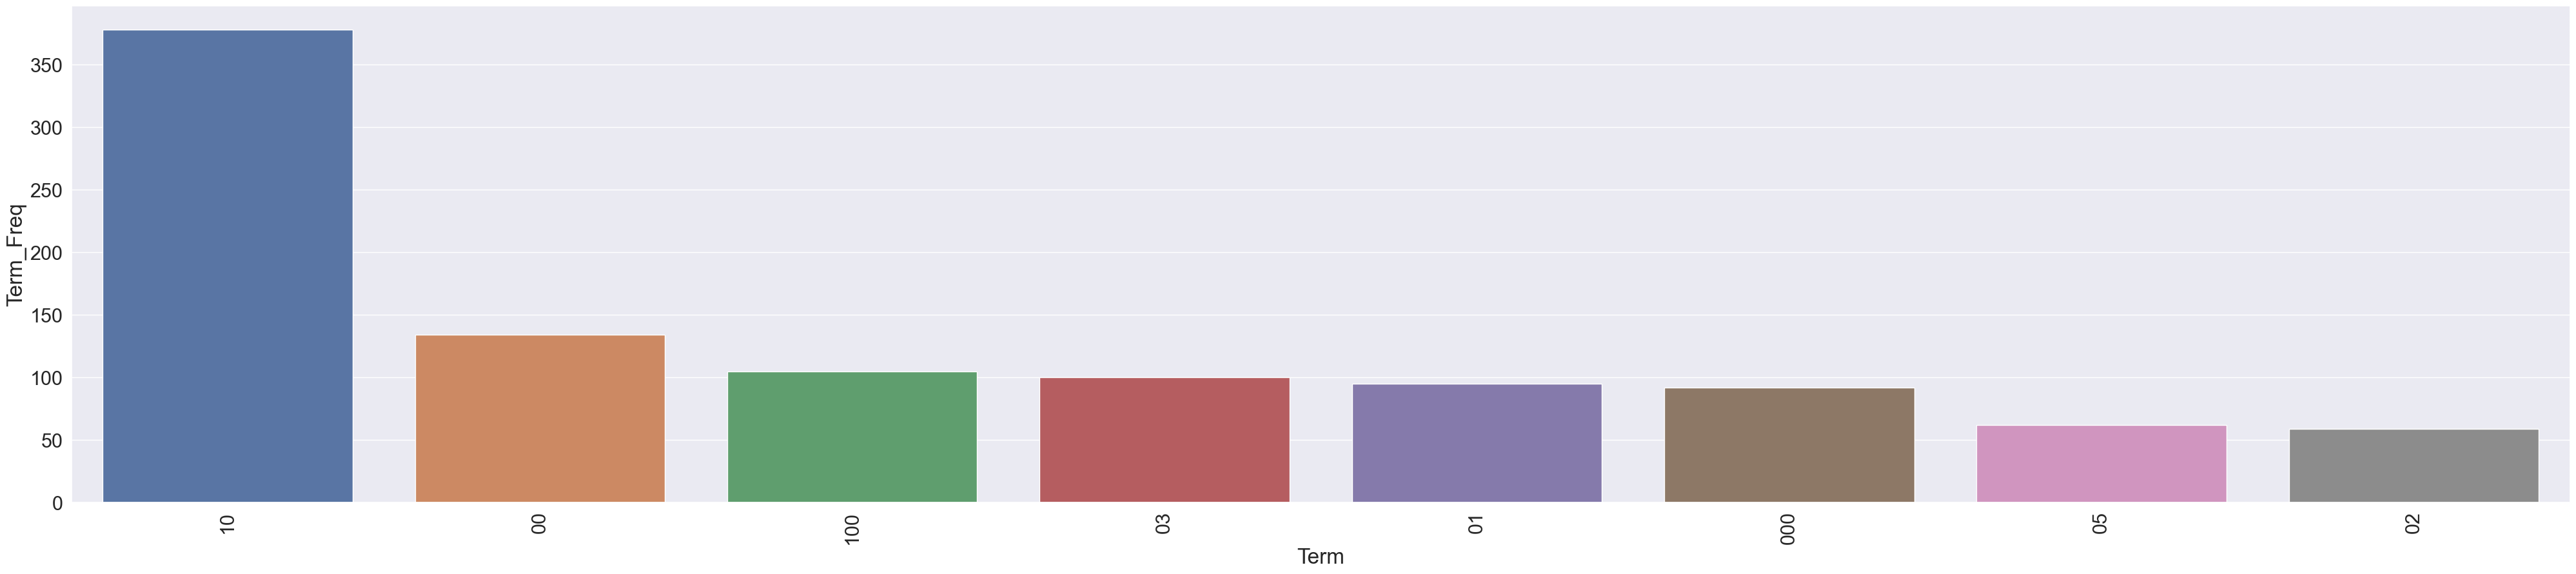

In [35]:
## Answer here ##

# Efficiency reduce term which frequency <= 50
# Purpose: Visualize the frequency term which show frequency > 50, also sort the value data to easily visualize.

df_filter = df_plotly[df_plotly.Term_Freq > 50].sort_values('Term_Freq', ascending = False)

sns.set(font_scale = 2)

plt.subplots(figsize=(50, 10))
g1 = sns.barplot(x=df_filter.Term, y=df_filter.Term_Freq, order = df_plotly[df_plotly.Term_Freq > 50].sort_values('Term_Freq', ascending = False).Term)
g1.set_xticklabels(df_filter.Term, rotation = 90);

In [36]:
## end of the answer ##

---

# Exercise 15
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

[Text(0, 0, '10'),
 Text(1, 0, '00'),
 Text(2, 0, '100'),
 Text(3, 0, '03'),
 Text(4, 0, '01'),
 Text(5, 0, '000'),
 Text(6, 0, '05'),
 Text(7, 0, '02'),
 Text(8, 0, '04'),
 Text(9, 0, '08'),
 Text(10, 0, '09'),
 Text(11, 0, '07'),
 Text(12, 0, '0358'),
 Text(13, 0, '1000'),
 Text(14, 0, '101'),
 Text(15, 0, '06'),
 Text(16, 0, '00pm'),
 Text(17, 0, '1013'),
 Text(18, 0, '102'),
 Text(19, 0, '1024x768'),
 Text(20, 0, '071'),
 Text(21, 0, '1024'),
 Text(22, 0, '00am'),
 Text(23, 0, '0349'),
 Text(24, 0, '084042'),
 Text(25, 0, '0511'),
 Text(26, 0, '081052'),
 Text(27, 0, '101010'),
 Text(28, 0, '0200'),
 Text(29, 0, '0100'),
 Text(30, 0, '103'),
 Text(31, 0, '095220'),
 Text(32, 0, '0423'),
 Text(33, 0, '040'),
 Text(34, 0, '01580'),
 Text(35, 0, '02118'),
 Text(36, 0, '0293'),
 Text(37, 0, '0600'),
 Text(38, 0, '02173'),
 Text(39, 0, '041343'),
 Text(40, 0, '023044'),
 Text(41, 0, '024103'),
 Text(42, 0, '0608'),
 Text(43, 0, '06320'),
 Text(44, 0, '0x100'),
 Text(45, 0, '102007'),
 T

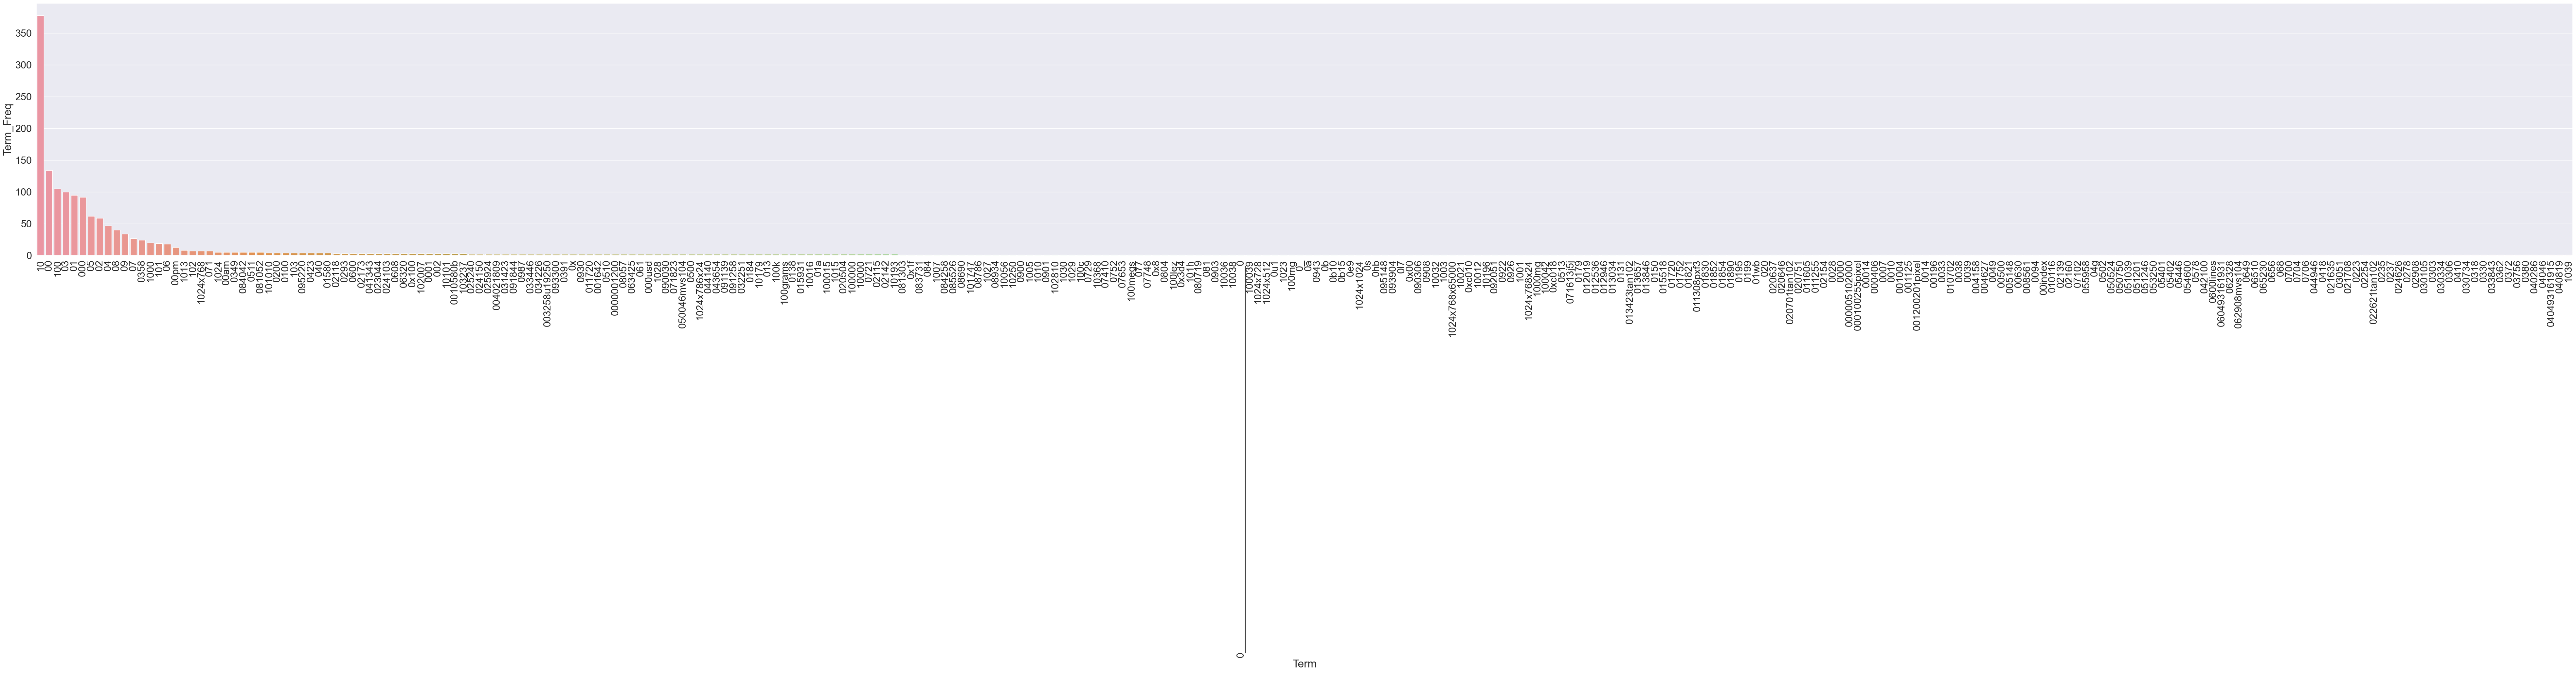

In [37]:
## Answer here ##

# Sort the X-value and then plot barplot.
# After sort X-value and plot it, the bar plot look like long tail and this time graph will be more meaningful.

df_plotly.sort_values('Term_Freq', ascending = False)
plt.subplots(figsize=(100, 10))

g = sns.barplot(x=df_plotly.Term,
                y=df_plotly.Term_Freq,
                data = df_plotly,
                order = df_plotly.sort_values('Term_Freq', ascending = False).Term)

g.set_xticklabels(g.get_xticklabels(), rotation = 90)

In [38]:
## end of the answer ##

---

# Exercise 16
Try to generate the binarization using the `category_name` column instead. Does it work?

In [39]:
# Prerequisites from the lab
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [40]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)

LabelBinarizer()

In [41]:
X['bin_category'] = mlb.transform(X['category']).tolist()
X[0:]

,text,category,category_name,bin_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]"
...,...,...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med,"[0, 0, 1, 0]"
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med,"[0, 0, 1, 0]"
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med,"[0, 0, 1, 0]"
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med,"[0, 0, 1, 0]"


---
---

# Part 2

## 1. The Data

Referece 
https://archive.ics.uci.edu/dataset/331/sentiment+labelled+sentences

These data contains sentences labelled with positive or negative sentiment from three different websites/fields:
- imdb.com
- amazon.com
- yelp.com

> For each website, there exist 500 positive and 500 negative sentences. Those were selected randomly for larger datasets of reviews. 
We attempted to select sentences that have a clearly positive or negative connotaton, the goal was for **no neutral sentences** to be selected.

> Score is either **1** (for positive 👍) or **0** (for negative 👎)

> Has Missing Values? - No

↳ So no need to filter missing value out

↳ Or confirm in step ***4.1) Missing Values***


## 2. Data Preparation
We are going to use `sklearn.datasets.load_files` to import our dataset into our project. Base on it's [document](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_files.html), we have to create sub folders, move files to right folders, and use their folder names as cateragory name.

In [42]:
from sklearn.datasets import load_files

# Use os.path to support running from different OS
from os import path
here = path.dirname(__file__) if '__file__' in locals() else '.'

# Declare what categories we are going to use, match with the folder names
hw_categories = ['amazon', 'imdb', 'yelp']

sentiment_labelled_sentences = load_files(container_path=path.join(here, 'sentiment-labelled-sentences'), categories=hw_categories)

In [43]:
sentiment_labelled_sentences

{'data': [b'Wow... Loved this place.\t1\nCrust is not good.\t0\nNot tasty and the texture was just nasty.\t0\nStopped by during the late May bank holiday off Rick Steve recommendation and loved it.\t1\nThe selection on the menu was great and so were the prices.\t1\nNow I am getting angry and I want my damn pho.\t0\nHoneslty it didn\'t taste THAT fresh.)\t0\nThe potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.\t0\nThe fries were great too.\t1\nA great touch.\t1\nService was very prompt.\t1\nWould not go back.\t0\nThe cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.\t0\nI tried the Cape Cod ravoli, chicken,with cranberry...mmmm!\t1\nI was disgusted because I was pretty sure that was human hair.\t0\nI was shocked because no signs indicate cash only.\t0\nHighly recommended.\t1\nWaitress was a little slow in service.\t0\nThis place is not worth your time, let alone Vegas.\t0\ndid not li

Let's see what the data look likes

In [44]:
sentiment_labelled_sentences.data

[b'Wow... Loved this place.\t1\nCrust is not good.\t0\nNot tasty and the texture was just nasty.\t0\nStopped by during the late May bank holiday off Rick Steve recommendation and loved it.\t1\nThe selection on the menu was great and so were the prices.\t1\nNow I am getting angry and I want my damn pho.\t0\nHoneslty it didn\'t taste THAT fresh.)\t0\nThe potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.\t0\nThe fries were great too.\t1\nA great touch.\t1\nService was very prompt.\t1\nWould not go back.\t0\nThe cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.\t0\nI tried the Cape Cod ravoli, chicken,with cranberry...mmmm!\t1\nI was disgusted because I was pretty sure that was human hair.\t0\nI was shocked because no signs indicate cash only.\t0\nHighly recommended.\t1\nWaitress was a little slow in service.\t0\nThis place is not worth your time, let alone Vegas.\t0\ndid not like at all

In [45]:
# Check if categores are correct
sentiment_labelled_sentences.target_names

['amazon', 'imdb', 'yelp']

In [46]:
# Check length of the data
len(sentiment_labelled_sentences.data)

3

In [47]:
# Check length of the filenames
len(sentiment_labelled_sentences.filenames)

3

**We can also print an example from the subset**

But first! You may notice the letter `b` before the text data, that means the data has been encoded as `byte`. We need to `decode()` to render the data.

In [48]:
# An example of what the subset contains
print('\n'.join(sentiment_labelled_sentences.data[0].decode().split('\n')))

Wow... Loved this place.	1
Crust is not good.	0
Not tasty and the texture was just nasty.	0
Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.	1
The selection on the menu was great and so were the prices.	1
Now I am getting angry and I want my damn pho.	0
Honeslty it didn't taste THAT fresh.)	0
The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.	0
The fries were great too.	1
A great touch.	1
Service was very prompt.	1
Would not go back.	0
The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.	0
I tried the Cape Cod ravoli, chicken,with cranberry...mmmm!	1
I was disgusted because I was pretty sure that was human hair.	0
I was shocked because no signs indicate cash only.	0
Highly recommended.	1
Waitress was a little slow in service.	0
This place is not worth your time, let alone Vegas.	0
did not like at all.	0
The Burrittos Blah!	0
The food, amazin

Determine the label of the example via `target_names` key value

In [49]:
print(sentiment_labelled_sentences.target_names[sentiment_labelled_sentences.target[0]])

yelp


In [50]:
sentiment_labelled_sentences.target[0]

2

We can also get the category of 3 documents via `target` key value

In [51]:

sentiment_labelled_sentences.target[0:3]

array([2, 1, 0])

Another one way to get access to the text version of the label of a subset of our `sentiment_labelled_sentences`

In [52]:
for c in sentiment_labelled_sentences.target:
    print(sentiment_labelled_sentences.target_names[c])

yelp
imdb
amazon


In [53]:
len(sentiment_labelled_sentences.data[0])

61320

## 3. Data Transformation
So we want to explore and understand our data a little bit better. Before we do that we definitely need to apply some transformations just so we can have our dataset in a nice format to be able to explore it freely and more efficient. Lucky for us, there are powerful scientific tools to transform our data into that tabular format we are so farmiliar with. So that is what we will do in the next section--transform our data into a nice table format.

### 3.1 Converting Dictionary into Pandas Dataframe
Here we will show you how to convert dictionary objects into a pandas dataframe. And by the way, a pandas dataframe is nothing more than a table magically stored for efficient information retrieval.

But First! we need to convert our data into **dictionary object**

In [54]:
# Create empty dictionary for storing sentence data
sentiment_dic = {}

# sentiment_dic's structure
# sentiment_dic = {'sentence' : {'categories' : {}, scores : {}}, ... }

# Readme.txt shown format of data as below.
# sentence \t score \n

# Loop for split [sentence] & [score] of website into `sentiment_dic` dict
for i in sentiment_labelled_sentences.target:
    list_temp_1 = []
    # Data that we have loaded are store encode in byte; we have to decode it from byte to str.
    # Then split each of review; list_temp_1 will have review sentence with score.
    list_temp_1 = sentiment_labelled_sentences.data[i].decode().split('\n')
    for j in range(len(list_temp_1) - 1):
        list_temp_2 = []
        # This step will split sentence and score.
        # Then append in data_sentiment dictionary.
        list_temp_2 = list_temp_1[j].split('\t')
        sentiment_dic[list_temp_2[0]] = {}
        sentiment_dic[list_temp_2[0]]['score'] = list_temp_2[1]
        sentiment_dic[list_temp_2[0]]['website'] = sentiment_labelled_sentences.target_names[i]

In [55]:
len(sentiment_dic)

2983

In [56]:
# The dataset's reference mentions that sentiment_dic should be 3,000 data.
## ↳ 500postive+500negative = 1,000 sentences per website -> 3,000 sentences from 3 websites

# Because dictionary characteristics it will not duplicate data in dictionary.

The dictionary object is ready then convert it into a Pandas Dataframe

In [57]:
import pandas as pd

import sys
sys.path.append('..') # Since we are inside folder, but we want to use the lib outside
import helpers.data_mining_helpers as dmh

Y = pd.DataFrame(sentiment_dic.keys(), columns = ['sentence'])  

In [58]:
len(Y)

2983

In [59]:
Y[0:2]

,sentence
0,So there is no way for me to plug it in here i...
1,"Good case, Excellent value."


In [60]:
for t in Y['sentence'][:3]:
    print(t)

So there is no way for me to plug it in here in the US unless I go by a converter.
Good case, Excellent value.
Great for the jawbone.


**Adding Columns**

In [61]:
# I have created new helper: format_labels_sentiment()

# Adding 'scores' column to Y-dataframe.
Y['score'] = Y.sentence.apply(lambda t: dmh.format_labels_sentiment(t, 'score', sentiment_dic))

# Adding 'website' column to Y-dataframe.
Y['website'] = Y.sentence.apply(lambda t: dmh.format_labels_sentiment(t, 'website', sentiment_dic))

Now we can print and see what our table looks like.

In [62]:
Y[0:10]

,sentence,score,website
0,So there is no way for me to plug it in here i...,0,yelp
1,"Good case, Excellent value.",1,yelp
2,Great for the jawbone.,1,yelp
3,Tied to charger for conversations lasting more...,0,yelp
4,The mic is great.,1,yelp
5,I have to jiggle the plug to get it to line up...,0,yelp
6,If you have several dozen or several hundred c...,0,yelp
7,If you are Razr owner...you must have this!,1,yelp
8,"Needless to say, I wasted my money.",0,yelp
9,What a waste of money and time!.,0,yelp


### 3.2 Familiarizing yourself with data
To begin to show you the awesomeness of Pandas dataframes, let us look at how to run a simple query on our dataset. We want to query for the first 10 rows (documents), and we only want to keep the `sentence` and `website` attributes or fields.

In [63]:
# A simple query #
Y[:10][['sentence', 'website']]

,sentence,website
0,So there is no way for me to plug it in here i...,yelp
1,"Good case, Excellent value.",yelp
2,Great for the jawbone.,yelp
3,Tied to charger for conversations lasting more...,yelp
4,The mic is great.,yelp
5,I have to jiggle the plug to get it to line up...,yelp
6,If you have several dozen or several hundred c...,yelp
7,If you are Razr owner...you must have this!,yelp
8,"Needless to say, I wasted my money.",yelp
9,What a waste of money and time!.,yelp


**Let's query the last 10 records**

In [64]:
Y[-10:]

,sentence,score,website
2973,The refried beans that came with my meal were ...,0,amazon
2974,Spend your money and time some place else.,0,amazon
2975,A lady at the table next to us found a live gr...,0,amazon
2976,the presentation of the food was awful.,0,amazon
2977,I can't tell you how disappointed I was.,0,amazon
2978,I think food should have flavor and texture an...,0,amazon
2979,Appetite instantly gone.,0,amazon
2980,Overall I was not impressed and would not go b...,0,amazon
2981,"The whole experience was underwhelming, and I ...",0,amazon
2982,"Then, as if I hadn't wasted enough of my life ...",0,amazon


In [65]:
# using loc (by label)
Y.loc[:10, 'sentence']

0     So there is no way for me to plug it in here i...
1                           Good case, Excellent value.
2                                Great for the jawbone.
3     Tied to charger for conversations lasting more...
4                                     The mic is great.
5     I have to jiggle the plug to get it to line up...
6     If you have several dozen or several hundred c...
7           If you are Razr owner...you must have this!
8                   Needless to say, I wasted my money.
9                      What a waste of money and time!.
10                      And the sound quality is great.
Name: sentence, dtype: object

In [66]:
# using iloc (by position)
Y.iloc[:10, 0]

0    So there is no way for me to plug it in here i...
1                          Good case, Excellent value.
2                               Great for the jawbone.
3    Tied to charger for conversations lasting more...
4                                    The mic is great.
5    I have to jiggle the plug to get it to line up...
6    If you have several dozen or several hundred c...
7          If you are Razr owner...you must have this!
8                  Needless to say, I wasted my money.
9                     What a waste of money and time!.
Name: sentence, dtype: object

#### ** >>> Exercise 2 (take home): ** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [67]:
# Answer here
Y.loc[:3, ['sentence', 'score']]

,sentence,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0


#### ** >>> Exercise 3 (5 min): **
Try to fetch records belonging to the `imdb` website, and query every 10th record. Only show the first 5 records.

In [68]:
# Answer here
Y[(Y['website'] == 'imdb')].loc[::10][:5]

,sentence,score,website
990,"A very, very, very slow-moving, aimless movie ...",0,imdb
1000,And those baby owls were adorable.,1,imdb
1010,I can think of no other film where something v...,1,imdb
1020,"There are massive levels, massive unlockable c...",1,imdb
1030,The very idea of it was lame - take a minor ch...,0,imdb


## 4. Data Mining using Pandas
Let's do some serious work now. Let's learn to program some of the ideas and concepts learned so far in the data mining course. This is the only way we can be convince ourselves of the true power of Pandas dataframes. 

### 4.1 Missing Values

In [69]:
# Check missing values
Y.isnull()

,sentence,score,website
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
2978,False,False,False
2979,False,False,False
2980,False,False,False
2981,False,False,False


 As you saw above when the entire table was printed, it is impossible to tell if there are missing records just by looking at preview of records manually, especially in cases where the dataset is huge. We want a more reliable way to achieve this. Let's get to it!

In [70]:
Y.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,website
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


So we can confirm that there is no missing value, same the reference mentions

#### >>> **Exercise 4 (5 min):** 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [71]:
# Answer here
Y.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2978    (The amoung of missing records is: , 0)
2979    (The amoung of missing records is: , 0)
2980    (The amoung of missing records is: , 0)
2981    (The amoung of missing records is: , 0)
2982    (The amoung of missing records is: , 0)
Length: 2983, dtype: object

---

We have our function to check for missing records, now let us do something mischievous and insert some dummy data into the dataframe and test the reliability of our function. This dummy data is intended to corrupt the dataset. I mean this happens a lot today, especially when hackers want to hijack or corrupt a database.

We will insert a `Series`, which is basically a *"one-dimensional labeled array capable of holding data of any type (integer, string, float, python objects, etc.). The axis labels are collectively called index."*, into our current dataframe.

In [72]:
# Create dummy_series which the value is missing.
dummy_series = pd.Series(['dummy_record', 'amazon'], index = ['sentence', 'website'])
dummy_series

sentence    dummy_record
website           amazon
dtype: object

In [73]:
dummy_series.to_frame().T
# .to_frame() -> Convert Series to DataFrame
# .T          -> Transpose

,sentence,website
0,dummy_record,amazon


In [74]:
result_with_series = pd.concat([Y, dummy_series.to_frame().T], ignore_index=True)

In [75]:
# check if the records was commited into result
len(result_with_series)

2984

Now we that we have added the record with some missing values. Let try our function and see if it can detect that there is a missing value on the resulting dataframe.

In [76]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,website
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,1,0


Indeed there is a missing value in this new dataframe. Specifically, the missing value comes from the `score` attribute.

Notice that above we are not changing the `Y` dataframe as results are directly applied to the assignment variable provided. But in the event that we just want to keep things simple, we can just directly apply the changes to `Y` and assign it to itself as we will do below. This modification will create a need to remove this dummy record later on, which means that we need to learn more about Pandas dataframes.

In [77]:
# dummy record as dictionary format
dummy_dict = [{'sentence': 'dummy_record',
               'website': 'amazon'
               }]

In [78]:
Y = pd.concat([Y, pd.DataFrame(dummy_dict)], ignore_index = True)

In [79]:
len(Y)

2984

In [80]:
Y.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,website
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,1,0


So now that we can see that our data has missing values, we want to remove the records with missing values. The code to drop the record with missing that we just added, is the following:

In [81]:
Y.dropna(inplace=True)

... and now let us test to see if we gotten rid of the records with missing values.

In [82]:
Y.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,website
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [83]:
len(Y)

2983

### 4.2 Dealing with Duplicate Data
First, let us check how many duplicates we have in our current dataset.

In [84]:
Y.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2978    False
2979    False
2980    False
2981    False
2982    False
Length: 2983, dtype: bool

We can also check the sum of duplicate records by simply using `sum()`

In [85]:
sum(Y.duplicated())

0

It appears that we don't have any duplicates since none of our records resulted in `True`

 If we want to check for duplicates as we did above for some particular column, instead of all columns, we do something as shown below. So let us only check for duplicates by only checking the `sentence` attribute.

In [86]:
sum(Y.duplicated('sentence'))

0

Now let us create some duplicated dummy records and append it to the main dataframe `Y`. Subsequenlty, let us try to get rid of the duplicates.

In [87]:
dummy_duplicate_dict = [{
                             'sentence': 'dummy record',
                             'score': 1, 
                             'website': "dummy web"
                        },
                        {
                             'sentence': 'dummy record',
                             'score': 1, 
                             'website': "dummy web"
                        }]

In [88]:
Y = pd.concat([Y, pd.DataFrame(dummy_duplicate_dict)], ignore_index=True)

In [89]:
len(Y)

2985

In [90]:
sum(Y.duplicated())

1

We have added the dummy duplicates to `Y`. Now we are faced with the decision as to what to do with the duplicated records after we have found it. In our case, we want to get rid of all the duplicated records without preserving a copy.

In [91]:
Y.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe
len(Y)

2983

## 5.  Data Preprocessing
### 5.1 Sampling
We don't have a problem of size in our current dataset since it is just ~three thousand records long. But if we pay attention to how much content is included in the `sentence` field of each of those records, you will realize that sampling may not be a bad idea after all.

In [92]:
print(Y.shape)
Y_sample = Y.sample(n=1000, random_state=42) #random state
display(Y_sample)

(2983, 3)


,sentence,score,website
2410,We've tried to like this place but after 10+ t...,0,amazon
1547,The script is a big flawed mess.,0,imdb
881,It was that loud.Glad to say that the Plantron...,1,yelp
331,The reception is excellent!,1,yelp
1837,Now imagine that every single one of those dec...,0,imdb
...,...,...,...
916,It looses connection to the phone even when it...,0,yelp
1211,There are the usual Hitchcock logic flaws.,0,imdb
2711,Awesome selection of beer.,1,amazon
2457,"Very good, though!",1,amazon


In [93]:
len(Y_sample)

1000

Let's do something cool here while we are working with sampling! Let us look at the distribution of categories in both the sample and original dataset. Let us visualize and analyze the disparity between the two datasets. To generate some visualizations, we are going to use `matplotlib` python library. With `matplotlib`, things are faster and compatability-wise it may just be the best visualization library for visualizing content extracted from dataframes and when using Jupyter notebooks. Let's take a loot at the magic of `matplotlib` below.

In [94]:
import matplotlib.pyplot as plt
%matplotlib inline

In [95]:
hw_categories

['amazon', 'imdb', 'yelp']

website
imdb      997
amazon    996
yelp      990
Name: count, dtype: int64


<Axes: title={'center': 'Website'}, xlabel='website'>

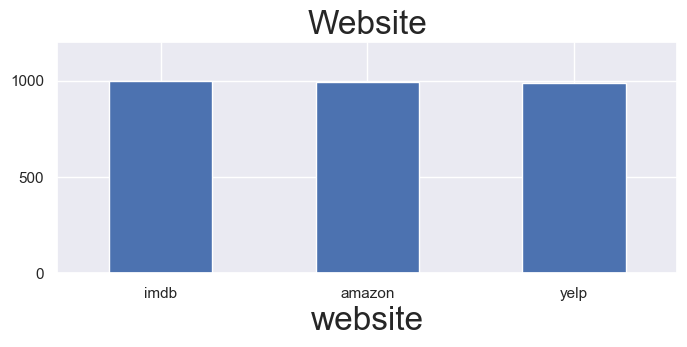

In [96]:
print(Y.website.value_counts())

# plot barchart for Y
Y.website.value_counts().plot(kind = 'bar',
                                    title = 'Website',
                                    ylim = [0, 1200],
                                    rot = 0, fontsize = 11, figsize = (8,3))

website
yelp      346
amazon    332
imdb      322
Name: count, dtype: int64


<Axes: title={'center': 'Website'}, xlabel='website'>

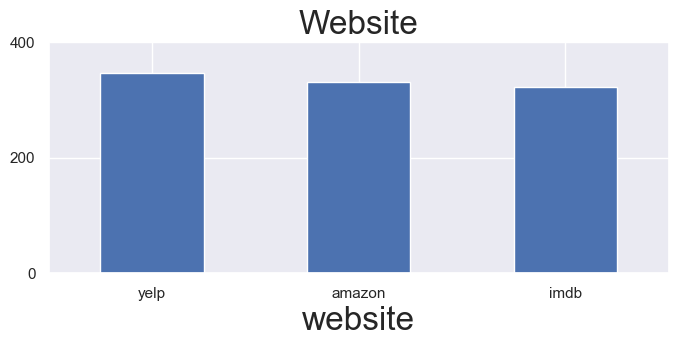

In [97]:
# Now let's try with 
print(Y_sample.website.value_counts())

# plot barchart for X
Y_sample.website.value_counts().plot(kind = 'bar',
                                    title = 'Website',
                                    ylim = [0, 400],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

#### >>> **Exercise 7 (5 min):**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

346
website
yelp      346
amazon    332
imdb      322
Name: count, dtype: int64


<Axes: title={'center': 'Website review'}, xlabel='website'>

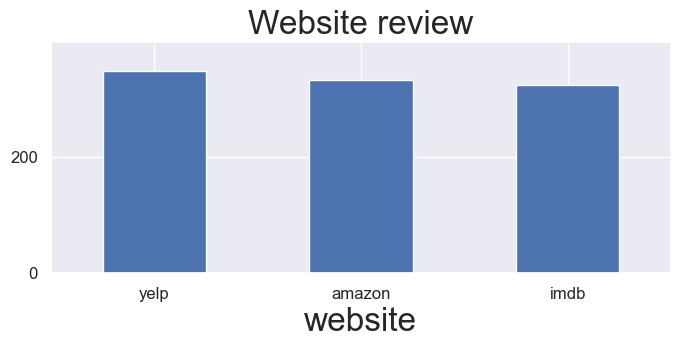

In [98]:
# Answer here

# plot barchart for Y_sample
print(max(Y_sample.website.value_counts()))
upper_bound = max(Y_sample.website.value_counts() + 50)
print(Y_sample.website.value_counts())

Y_sample.website.value_counts().plot(kind = 'bar',
                                           title = 'Website review',
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

#### Exercise 8 (take home):
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise.

997


<Axes: title={'center': 'Website review'}>

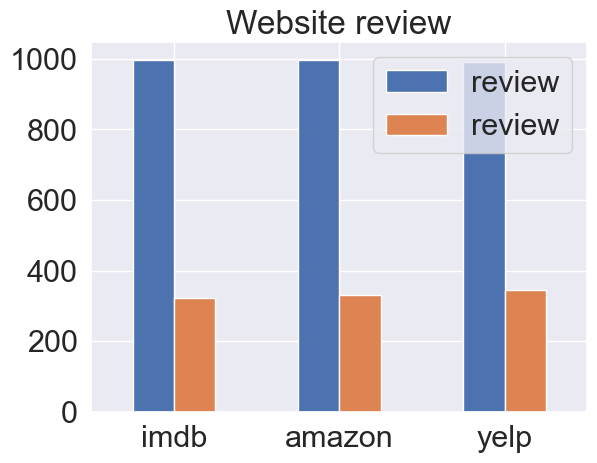

In [99]:
# Answer here
hw_new_df = pd.concat([Y.website.value_counts(), Y_sample.website.value_counts()], axis=1)
hw_new_df.columns = ['review', 'review']
hw_new_df_upper_bound = max(Y.website.value_counts() + 50)

print(max(Y.website.value_counts()))
hw_new_df.plot(kind = 'bar',
            title = 'Website review',
            ylim = [0, hw_new_df_upper_bound],
            xlabel='', # Remove default X's label
            rot = 0)

### 5.2 Feature Creation
Before going into any further coding, we will also introduce a useful text mining library called [NLTK](http://www.nltk.org/). The NLTK library is a natural language processing tool used for text mining tasks, so might as well we start to familiarize ourselves with it from now (It may come in handy for the final project!). In partcular, we are going to use the NLTK library to conduct tokenization because we are interested in splitting a sentence into its individual components, which we refer to as words, emojis, emails, etc. So let us go for it! We can call the `nltk` library as follows:

```python
import nltk
```

In [100]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kanokphanthananchai/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [101]:
# takes a like a minute or two to process
Y['unigrams'] = Y['sentence'].apply(lambda x: dmh.tokenize_text(x))

In [102]:
Y[0:4]["unigrams"]

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

If you take a closer look at the `Y` table now, you will see the new columns unigrams that we have added. You will notice that it contains an array of tokens, which were extracted from the original `sentence` field. At first glance, you will notice that the tokenizer is not doing a great job, let us take a closer at a single record and see what was the exact result of the tokenization using the `nltk` library.

In [103]:
Y[0:4]

,sentence,score,website,unigrams
0,So there is no way for me to plug it in here i...,0,yelp,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,yelp,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,yelp,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,yelp,"[Tied, to, charger, for, conversations, lastin..."


In [104]:
list(Y[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

### 5.3 Feature subset selection
We are going to move away from our main dataset (one form of feature subset selection), and we are going to generate a document-term matrix from the original dataset. In other words we are going to be creating something like this. 

![alt txt](https://docs.google.com/drawings/d/e/2PACX-1vS01RrtPHS3r1Lf8UjX4POgDol-lVF4JAbjXM3SAOU-dOe-MqUdaEMWwJEPk9TtiUvcoSqTeE--lNep/pub?w=748&h=366)

In [105]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
Y_counts = count_vect.fit_transform(Y.sentence) #learn the vocabulary and return document-term matrix
print(Y_counts.shape)

(2983, 5155)


In [106]:
print(Y_counts[0])


  (0, 4161)	1
  (0, 4545)	1
  (0, 2427)	1
  (0, 3043)	1
  (0, 4987)	1
  (0, 1829)	1
  (0, 2809)	1
  (0, 4609)	1
  (0, 3387)	1
  (0, 2432)	1
  (0, 2314)	2
  (0, 2158)	1
  (0, 4531)	1
  (0, 4835)	1
  (0, 4793)	1
  (0, 1982)	1
  (0, 647)	1
  (0, 1013)	1


In [107]:
count_vect.get_feature_names_out()[3454]

'premise'

In [108]:
count_vect.get_feature_names_out()[334]


'auju'

In [109]:
analyze = count_vect.build_analyzer()
analyze(Y.sentence[0])

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

What we did with those two lines of code is that we transformed the articles into a **term-document matrix**. Those lines of code tokenize each article using a built-in, default tokenizer (often referred to as an `analzyer`) and then produces the word frequency vector for each document.

#### **>>> Exercise 9 (5 min):**
Let's analyze the first record of our Y dataframe with the new analyzer we have just built. Go ahead try it!

In [110]:
# Answer here
# How do we turn our array[0] text document into a tokenized text using the build_analyzer()?
analyze(' '.join(list(Y[:1].sentence)))

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

Now let us look at the term-document matrix we built above.

In [111]:
# We can check the shape of this matrix by:
Y_counts.shape

(2983, 5155)

In [112]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names_out()[0:10]

array(['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17'],
      dtype=object)

![alt txt](https://i.imgur.com/57gA1sd.png)

Above we can see the features found in the all the documents `Y`, which are basically all the terms found in all the documents. As I said earlier, the transformation is not in the pretty format (table) we saw above -- the term-document matrix. We can do many things with the `count_vect` vectorizer and its transformation `Y_counts`. You can find more information on other cool stuff you can do with the [CountVectorizer](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction). 

Now let us try to obtain something that is as close to the pretty table I provided above. Before jumping into the code for doing just that, it is important to mention that the reason for choosing the `fit_transform` for the `CountVectorizer` is that it efficiently learns the vocabulary dictionary and returns a term-document matrix.

In the next bit of code, we want to extract the first five articles and transform them into document-term matrix, or in this case a 2-dimensional array. Here it goes. 

In [113]:
Y_counts.shape

(2983, 5155)

In [114]:
# we convert from sparse array to normal array
Y_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [115]:
count_vect.get_feature_names_out()[45:46]

array(['45'], dtype=object)

As you can see the result is just this huge sparse matrix, which is computationally intensive to generate and difficult to visualize. But we can see that the forth record, specifically, contains a `1`, which from our feature names we can deduce that this article contains exactly one `45` term.

---

To get you started in thinking about how to better analyze your data or transformation, let us look at this nice little heat map of our term-document matrix. It may come as a surpise to see the gems you can mine when you start to look at the data from a different perspective. Visualization are good for this reason.

In [116]:
# first fifty features only
plot_a = ['term_' + str(i) for i in count_vect.get_feature_names_out()[0:50]]
print(plot_a)

['term_00', 'term_10', 'term_100', 'term_11', 'term_12', 'term_13', 'term_15', 'term_15g', 'term_15pm', 'term_17', 'term_18', 'term_18th', 'term_1928', 'term_1947', 'term_1948', 'term_1949', 'term_1971', 'term_1973', 'term_1979', 'term_1980', 'term_1986', 'term_1995', 'term_1998', 'term_20', 'term_2000', 'term_2005', 'term_2006', 'term_2007', 'term_20th', 'term_2160', 'term_23', 'term_24', 'term_25', 'term_2mp', 'term_30', 'term_30s', 'term_325', 'term_35', 'term_350', 'term_375', 'term_3o', 'term_40', 'term_40min', 'term_42', 'term_44', 'term_45', 'term_4s', 'term_4ths', 'term_50', 'term_5020']


In [117]:
# obtain document index
plot_b = ['doc_' + str(i) for i in list(Y.index)[0:50]]
print(plot_b)

['doc_0', 'doc_1', 'doc_2', 'doc_3', 'doc_4', 'doc_5', 'doc_6', 'doc_7', 'doc_8', 'doc_9', 'doc_10', 'doc_11', 'doc_12', 'doc_13', 'doc_14', 'doc_15', 'doc_16', 'doc_17', 'doc_18', 'doc_19', 'doc_20', 'doc_21', 'doc_22', 'doc_23', 'doc_24', 'doc_25', 'doc_26', 'doc_27', 'doc_28', 'doc_29', 'doc_30', 'doc_31', 'doc_32', 'doc_33', 'doc_34', 'doc_35', 'doc_36', 'doc_37', 'doc_38', 'doc_39', 'doc_40', 'doc_41', 'doc_42', 'doc_43', 'doc_44', 'doc_45', 'doc_46', 'doc_47', 'doc_48', 'doc_49']


In [118]:
plot_c = Y_counts[0:50, 0:50].toarray() #Y_counts[how many documents, how many terms]
print(plot_c)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


For the heat map, we are going to use another visualization library called `seaborn`. It's built on top of matplotlib and closely integrated with pandas data structures.

![alt txt](https://i.imgur.com/1isxmIV.png)

The other big advantage of seaborn is that seaborn has some built-in plots that matplotlib does not support. Most of these can eventually be replicated by hacking away at matplotlib, but they’re not built in and require much more effort to build.

So without further ado, let us try it now!

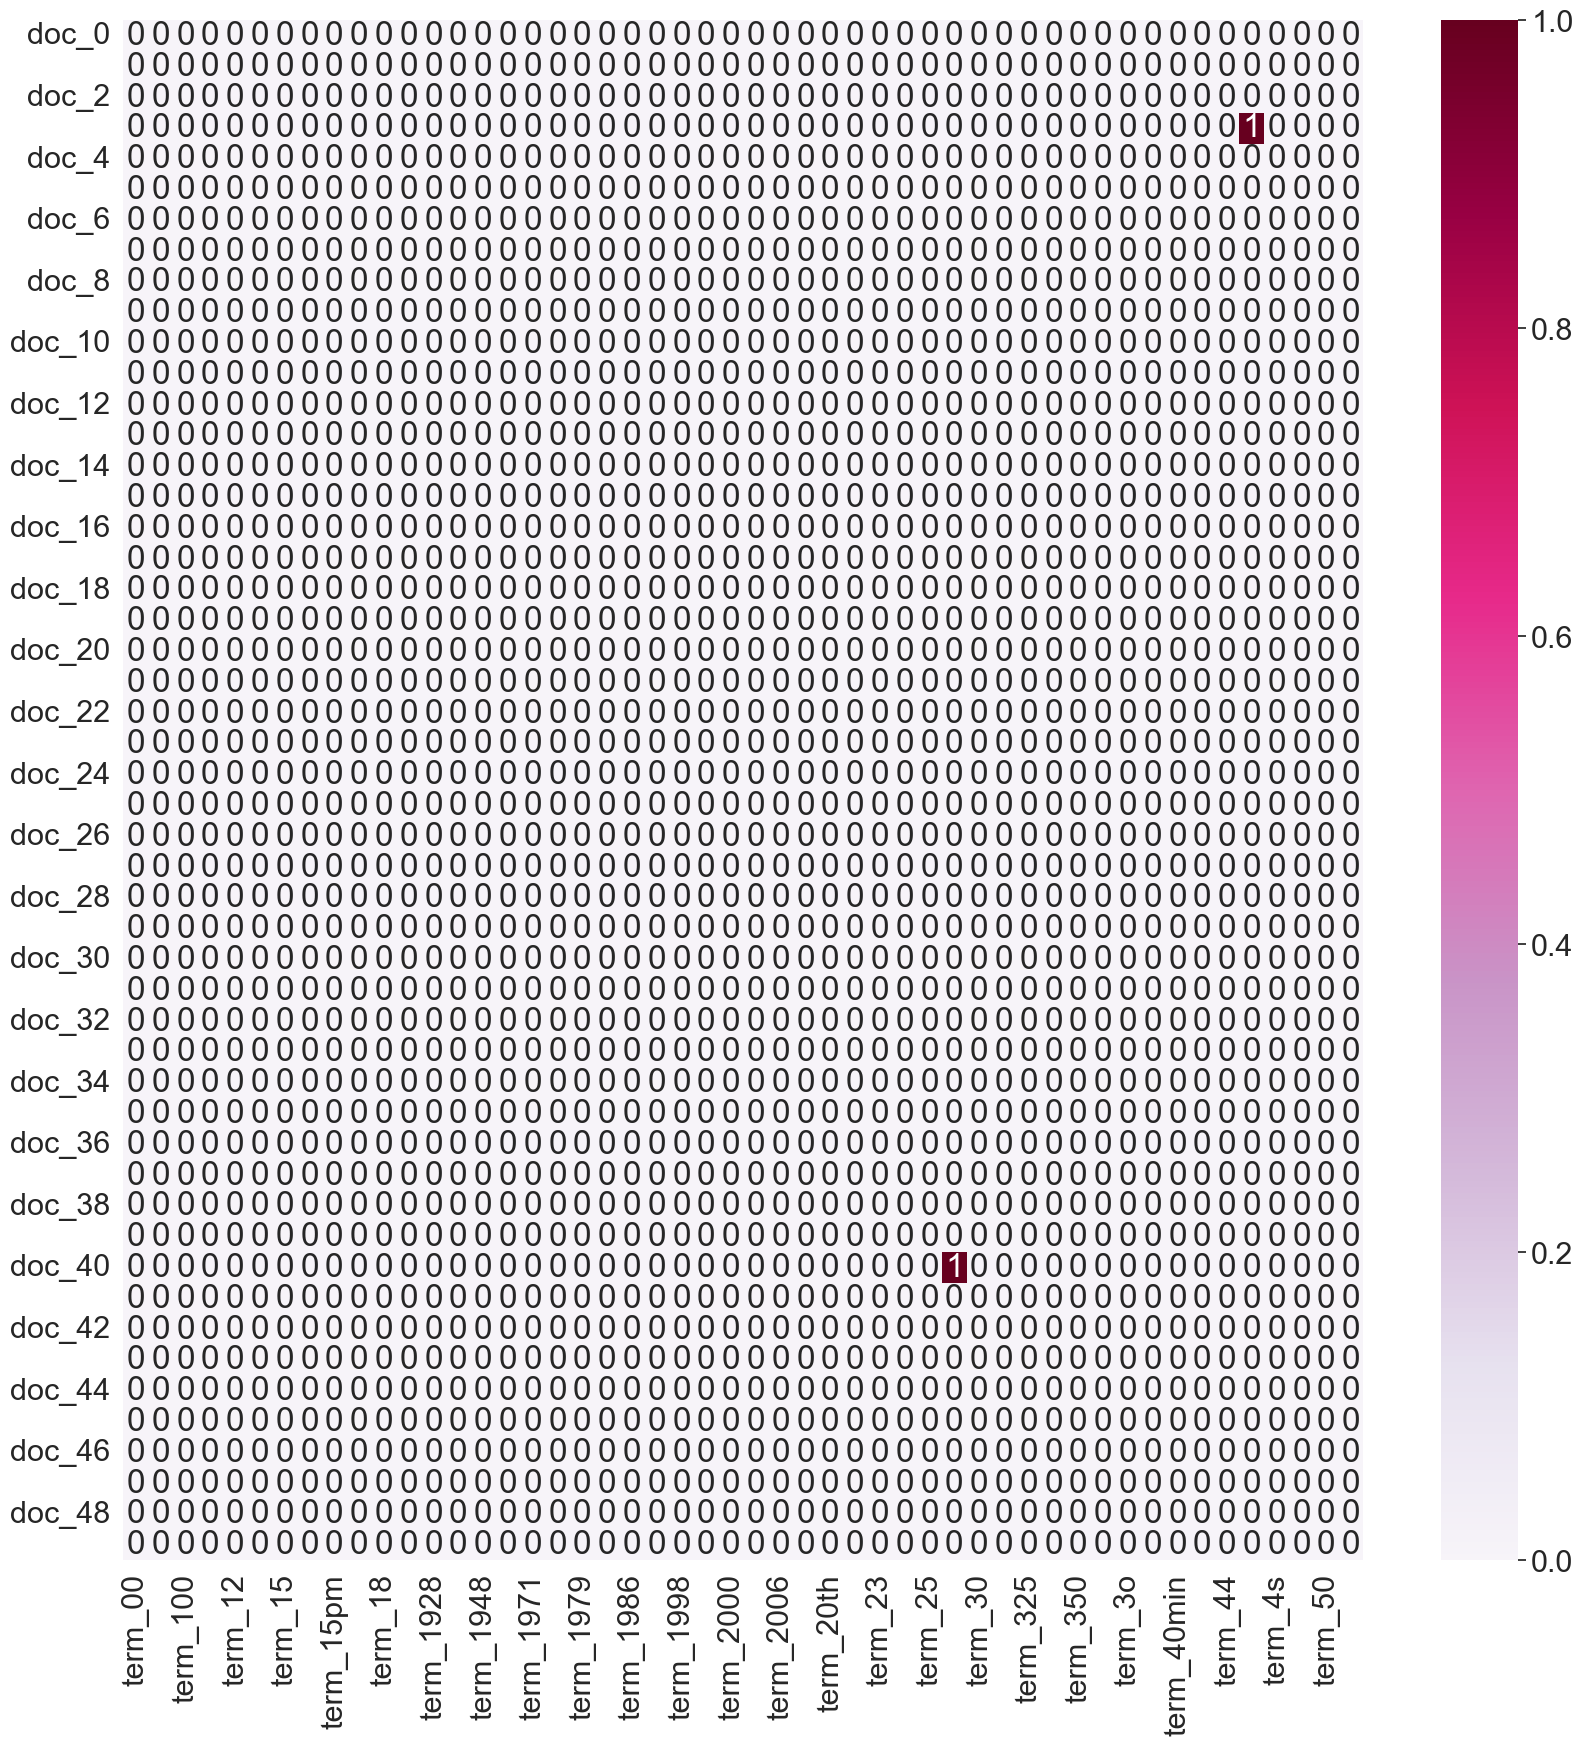

In [119]:
import seaborn as sns

new_df_todraw = pd.DataFrame(plot_c, columns=plot_a, index=plot_b)
plt.subplots(figsize=(20, 20))
new_ax = sns.heatmap(new_df_todraw,
                 cmap='PuRd',
                 vmin=0, vmax=1, annot=True)
new_ax = sns.set(font_scale = 0.5)

### 5.4 Dimensionality Reduction

We are going to make use of Principal Component Analysis to efficiently reduce the dimensions of our data, with the main goal of *"finding a projection that captures the largest amount of variation in the data."* This concept is important as it is very useful for visualizing and observing the characteristics of our dataset.

PCA Algorithm

__Input__: Raw term-vector matrix

__Output__: Projections

In [120]:
print(Y_counts.shape)

(2983, 5155)


In [121]:
from sklearn.decomposition import PCA

Y_reduced = PCA(n_components=2).fit_transform(Y_counts.toarray())
Y_reduced.shape

(2983, 2)

In [122]:
hw_categories

['amazon', 'imdb', 'yelp']

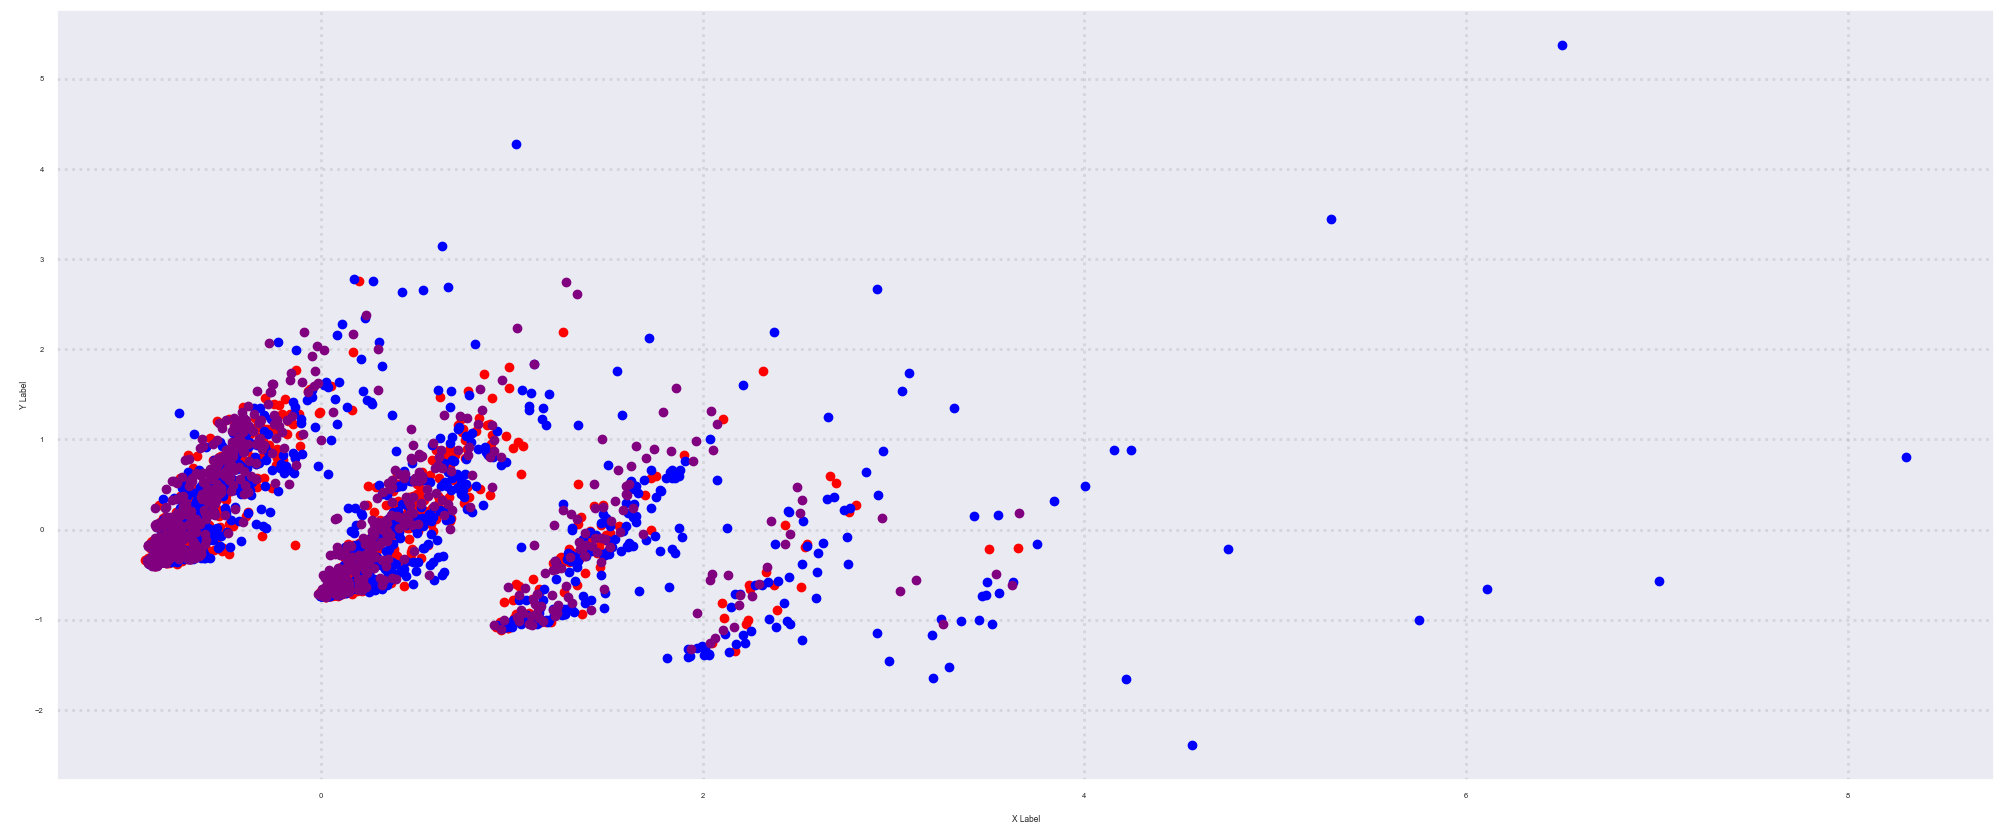

In [123]:
new_color = ['red', 'blue', 'purple', 'green']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, site in zip(new_color, hw_categories):
    xs = Y_reduced[Y['website'] == site].T[0]
    ys = Y_reduced[Y['website'] == site].T[1]

    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

From the 2D visualization above, we can see a slight *"hint of separation in the data"*; i.e., they might have some special grouping by category, but it is not immediately clear. The PCA was applied to the raw frequencies and this is considered a very naive approach as some words are not really unique to a document. Only categorizing by word frequency is considered a *"bag of words"* approach. Later on in the course you will learn about different approaches on how to create better features from the term-vector matrix, such as term-frequency inverse document frequency so-called TF-IDF.

### 5.5 Attribute Transformation / Aggregation
We can do other things with the term-vector matrix besides applying dimensionality reduction technique to deal with sparsity problem. Here we are going to generate a simple distribution of the words found in all the entire set of articles. Intuitively, this may not make any sense, but in data science sometimes we take some things for granted, and we just have to explore the data first before making any premature conclusions. On the topic of attribute transformation, we will take the word distribution and put the distribution in a scale that makes it easy to analyze patterns in the distrubution of words. Let us get into it!

First, we need to compute these frequencies for each term in all documents. Visually speaking, we are seeking to add values of the 2D matrix, vertically; i.e., sum of each column. You can also refer to this process as aggregation, which we won't explore further in this notebook because of the type of data we are dealing with. But I believe you get the idea of what that includes.  

![alt txt](https://docs.google.com/drawings/d/e/2PACX-1vTMfs0zWsbeAl-wrpvyCcZqeEUf7ggoGkDubrxX5XtwC5iysHFukD6c-dtyybuHnYigiRWRlRk2S7gp/pub?w=750&h=412)

In [124]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
new_term_frequencies = []
print(Y_counts.shape[1])
for j in range(0, Y_counts.shape[1]):
    new_term_frequencies.append(sum(Y_counts[:,j].toarray()))

5155


In [125]:
import numpy as np

new_term_frequencies = np.asarray(Y_counts.sum(axis=0))[0]
new_term_frequencies[0] #sum of first term: 00

1

In [126]:
new_term_frequencies

array([ 1, 36,  3, ...,  1,  2,  1])

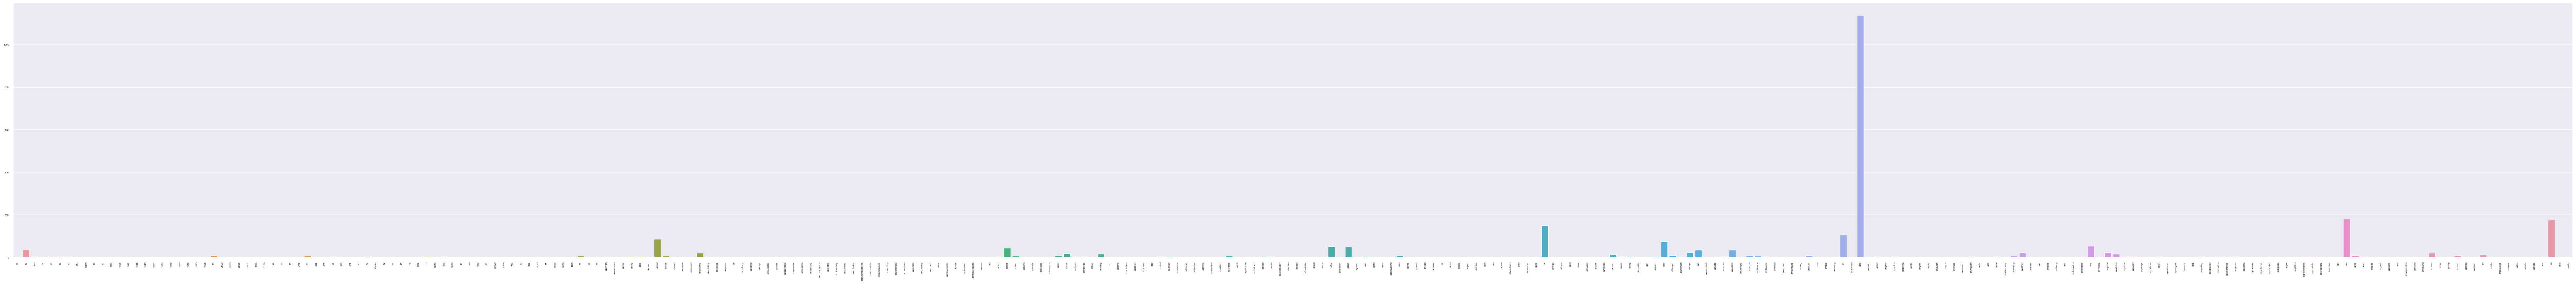

In [127]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=new_term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

#### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [128]:
import plotly.express as px

new_df_plotly = pd.DataFrame(count_vect.get_feature_names_out()[:300], columns = ['Term'])
new_df_plotly['Term_Freq'] = new_term_frequencies[:300]
new_df_plotly_fig = px.bar(new_df_plotly, x='Term', y='Term_Freq')
new_df_plotly_fig.show()

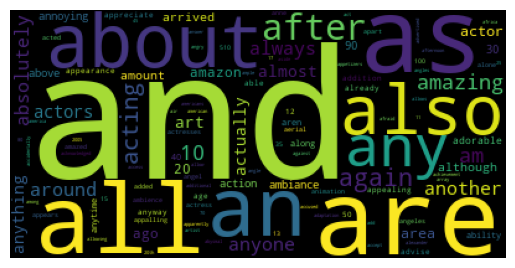

In [129]:
# Using Wordcloud
from wordcloud import WordCloud

dict_word = {}
new_count = 0

# Append data in dictionary which key = term, values = frequency.
for i in count_vect.get_feature_names_out()[:300]:
    dict_word[i] = new_term_frequencies.tolist()[new_count]
    new_count = new_count + 1

wordcloud = WordCloud(relative_scaling=0.5, normalize_plurals=False).generate_from_frequencies(dict_word)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise.

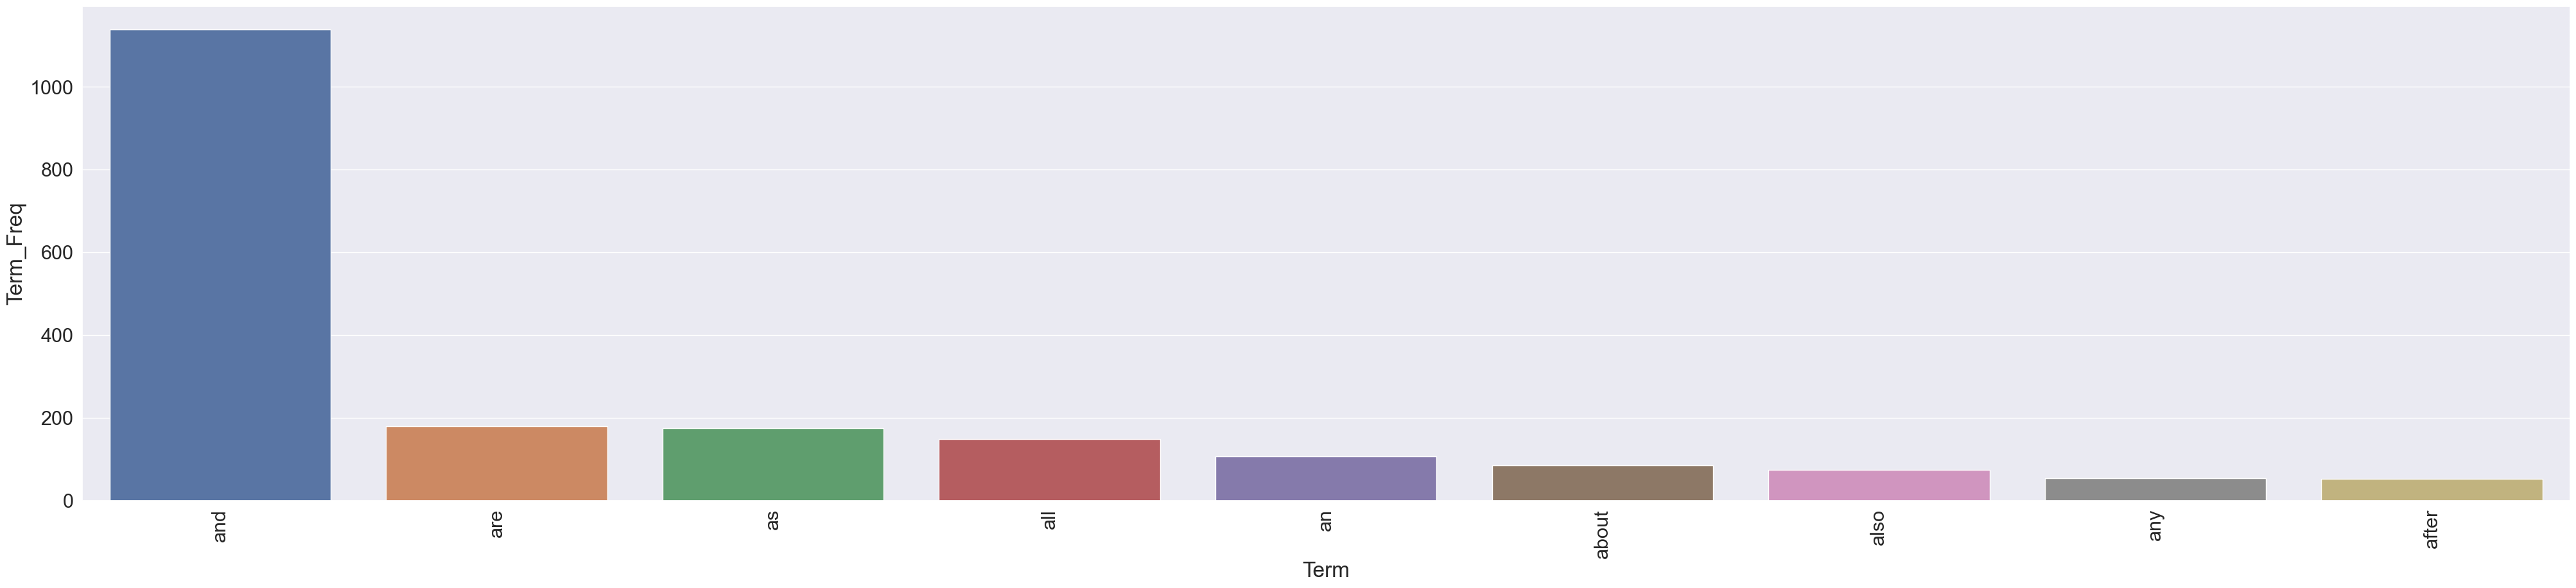

In [130]:
## Answer here ##

# Efficiency reduce term which frequency <= 50
# Purpose: Visualize the frequency term which show frequency > 50, also sort the value data to easily visualize.

new_df_filter = new_df_plotly[new_df_plotly.Term_Freq > 50].sort_values('Term_Freq', ascending = False)

sns.set(font_scale = 2)

plt.subplots(figsize=(50, 10))
new_g = sns.barplot(x=new_df_filter.Term, y=new_df_filter.Term_Freq, order = new_df_plotly[new_df_plotly.Term_Freq > 50].sort_values('Term_Freq', ascending = False).Term)
new_g.set_xticklabels(new_df_filter.Term, rotation = 90);

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

[Text(0, 0, '00'),
 Text(1, 0, '10'),
 Text(2, 0, '100'),
 Text(3, 0, '11'),
 Text(4, 0, '12'),
 Text(5, 0, '13'),
 Text(6, 0, '15'),
 Text(7, 0, '15g'),
 Text(8, 0, '15pm'),
 Text(9, 0, '17'),
 Text(10, 0, '18'),
 Text(11, 0, '18th'),
 Text(12, 0, '1928'),
 Text(13, 0, '1947'),
 Text(14, 0, '1948'),
 Text(15, 0, '1949'),
 Text(16, 0, '1971'),
 Text(17, 0, '1973'),
 Text(18, 0, '1979'),
 Text(19, 0, '1980'),
 Text(20, 0, '1986'),
 Text(21, 0, '1995'),
 Text(22, 0, '1998'),
 Text(23, 0, '20'),
 Text(24, 0, '2000'),
 Text(25, 0, '2005'),
 Text(26, 0, '2006'),
 Text(27, 0, '2007'),
 Text(28, 0, '20th'),
 Text(29, 0, '2160'),
 Text(30, 0, '23'),
 Text(31, 0, '24'),
 Text(32, 0, '25'),
 Text(33, 0, '2mp'),
 Text(34, 0, '30'),
 Text(35, 0, '30s'),
 Text(36, 0, '325'),
 Text(37, 0, '35'),
 Text(38, 0, '350'),
 Text(39, 0, '375'),
 Text(40, 0, '3o'),
 Text(41, 0, '40'),
 Text(42, 0, '40min'),
 Text(43, 0, '42'),
 Text(44, 0, '44'),
 Text(45, 0, '45'),
 Text(46, 0, '4s'),
 Text(47, 0, '4ths'),


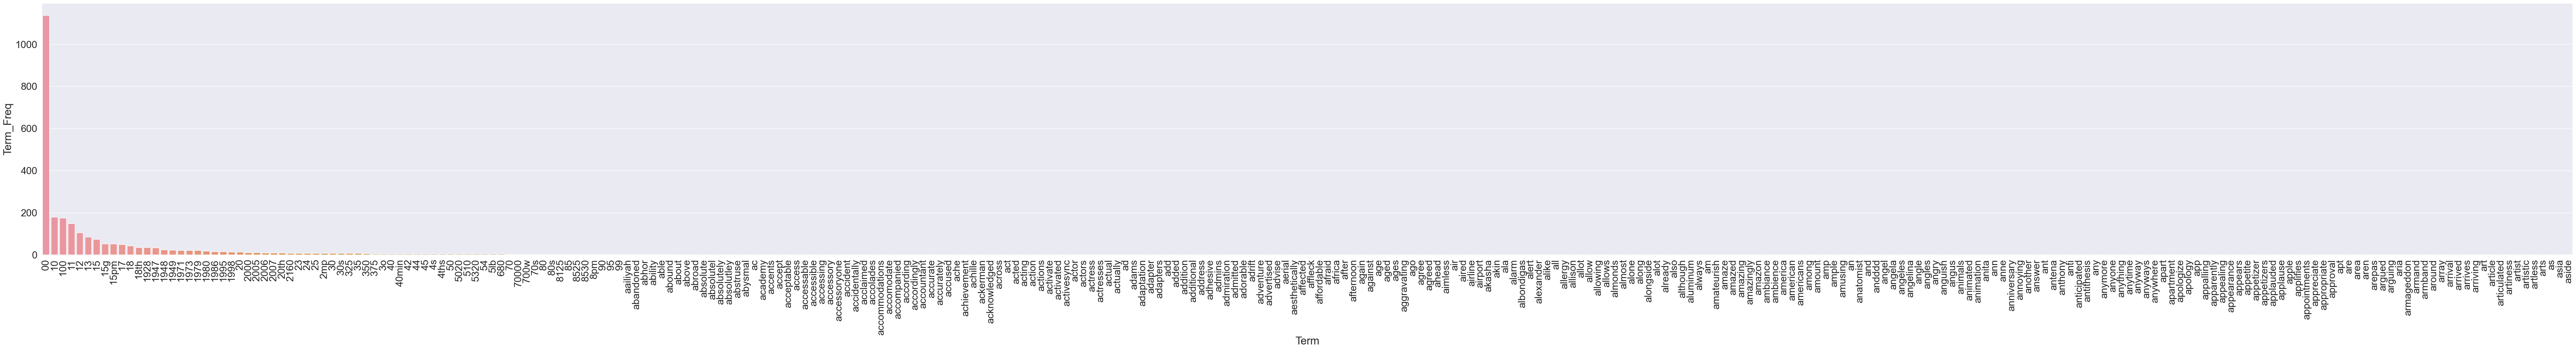

In [131]:
## Answer here ##

# Sort the X-value and then plot barplot.
# After sort X-value and plot it, the bar plot look like long tail and this time graph will be more meaningful.

new_df_plotly.sort_values('Term_Freq', ascending = False)
plt.subplots(figsize=(100, 10))

new_g_2 = sns.barplot(x=new_df_plotly.Term,
                y=new_df_plotly.Term_Freq,
                data = new_df_plotly,
                order = new_df_plotly.sort_values('Term_Freq', ascending = False).Term)

new_g_2.set_xticklabels(g.get_xticklabels(), rotation = 90)

### 5.6 Discretization and Binarization
In this section we are going to discuss a very important pre-preprocessing technique used to transform the data, specifically categorical values, into a format that satisfies certain criteria required by particular algorithms. Given our current original dataset, we would like to transform one of the attributes, `website`, into four binary attributes. In other words, we are taking the category name and replacing it with a `n` asymmetric binary attributes. The logic behind this transformation is discussed in detail in the recommended Data Mining text book (please refer to it on page 58). People from the machine learning community also refer to this transformation as one-hot encoding, but as you may become aware later in the course, these concepts are all the same, we just have different prefrence on how we refer to the concepts. Let us take a look at what we want to achieve in code. 

In [132]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(Y.website)

LabelBinarizer()

In [133]:
Y['bin_website'] = mlb.transform(Y['website']).tolist()

In [134]:
Y[0:9]

,sentence,score,website,unigrams,bin_website
0,So there is no way for me to plug it in here i...,0,yelp,"[So, there, is, no, way, for, me, to, plug, it...","[0, 0, 1]"
1,"Good case, Excellent value.",1,yelp,"[Good, case, ,, Excellent, value, .]","[0, 0, 1]"
2,Great for the jawbone.,1,yelp,"[Great, for, the, jawbone, .]","[0, 0, 1]"
3,Tied to charger for conversations lasting more...,0,yelp,"[Tied, to, charger, for, conversations, lastin...","[0, 0, 1]"
4,The mic is great.,1,yelp,"[The, mic, is, great, .]","[0, 0, 1]"
5,I have to jiggle the plug to get it to line up...,0,yelp,"[I, have, to, jiggle, the, plug, to, get, it, ...","[0, 0, 1]"
6,If you have several dozen or several hundred c...,0,yelp,"[If, you, have, several, dozen, or, several, h...","[0, 0, 1]"
7,If you are Razr owner...you must have this!,1,yelp,"[If, you, are, Razr, owner, ..., you, must, ha...","[0, 0, 1]"
8,"Needless to say, I wasted my money.",0,yelp,"[Needless, to, say, ,, I, wasted, my, money, .]","[0, 0, 1]"


Take a look at the new attribute we have added to the `Y` table. You can see that the new attribute, which is called `bin_website`, contains an array of 0's and 1's. The `1` is basically to indicate the position of the label or category we binarized. If you look at the first two records, the one is places in slot 2 in the array; this helps to indicate to any of the algorithms which we are feeding this data to, that the record belong to that specific category. 

Attributes with **continuous values** also have strategies to tranform the data; this is usually called **Discretization** (please refer to the text book for more inforamation).

## 6. Data Exploration
Sometimes you need to take a peek at your data to understand the relationships in your dataset. Here, we will focus in a similarity example. Let's take 3 documents and compare them.

In [135]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = Y.iloc[50]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = Y.iloc[100]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = Y.iloc[150]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

Let's look through the review data

In [136]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

["Not loud enough and doesn't turn on like it should."]
['Integrated seamlessly with the Motorola RAZR phone.']
['I Was Hoping for More.']


In [137]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [138]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print('Cosine Similarity using count bw 1 and 2: %(x)f' %{'x':cos_sim_count_1_2})
print('Cosine Similarity using count bw 1 and 3: %(x)f' %{'x':cos_sim_count_1_3})
print('Cosine Similarity using count bw 2 and 3: %(x)f' %{'x':cos_sim_count_2_3})

print('Cosine Similarity using count bw 1 and 1: %(x)f' %{'x':cos_sim_count_1_1})
print('Cosine Similarity using count bw 2 and 2: %(x)f' %{'x':cos_sim_count_2_2})
print('Cosine Similarity using count bw 3 and 3: %(x)f' %{'x':cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


/var/folders/wh/gf0x57sd1gq0d4r1whpxp2680000gn/T/ipykernel_83207/3818344812.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/wh/gf0x57sd1gq0d4r1whpxp2680000gn/T/ipykernel_83207/3818344812.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/wh/gf0x57sd1gq0d4r1whpxp2680000gn/T/ipykernel_83207/3818344812.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/wh/gf0x57sd1gq0d4r1whpxp2680000gn/T/ipykernel_83207/3818344812.py:17:

As expected, cosine similarity between a sentence and itself is 1. Between 2 entirely different sentences, it will be 0.

We can assume that we have the more common features in the documents 1 and 3 than in documents 1 and 2. This reflects indeed in a higher similarity than that of sentences 1 and 3.

---
---

# Part 3

## Generate TF-IDF features

In [139]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
Z = vectorizer.fit_transform(Y.sentence)
vectorizer.get_feature_names_out()

array(['00', '10', '100', ..., 'zillion', 'zombie', 'zombiez'],
      dtype=object)

In [140]:
# Create Dataframe of Z that already TD-IDF.
tf_idf = pd.DataFrame(Z.todense())
# Change the columns in to term.                    
tf_idf.columns = vectorizer.get_feature_names_out()
# Transpose
tf_idf_array = tf_idf.T

# Change column to sentence
tf_idf_array.columns = ['sentence' + str(i) for i in range(1, Z.shape[0]+1)]

# Create column name 'counts' as sum value of the term. (sum horizontal axis)
tf_idf_array['counts'] = tf_idf_array.sum(axis = 1)
# Sort array based on 'counts' value.
tf_idf_array = tf_idf_array.sort_values(by = 'counts', ascending=False)
tf_idf_array

,sentence1,sentence2,sentence3,sentence4,sentence5,sentence6,sentence7,sentence8,sentence9,sentence10,...,sentence2975,sentence2976,sentence2977,sentence2978,sentence2979,sentence2980,sentence2981,sentence2982,sentence2983,counts
the,0.086610,0.0,0.195022,0.0,0.204354,0.078687,0.063756,0.000000,0.0,0.000000,...,0.000000,0.081193,0.301846,0.0,0.000000,0.0,0.00000,0.085639,0.191265,176.914438
and,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.201132,...,0.144639,0.000000,0.000000,0.0,0.243903,0.0,0.15383,0.102103,0.000000,118.548045
it,0.119674,0.0,0.000000,0.0,0.000000,0.108726,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.088094,113.735335
is,0.120689,0.0,0.000000,0.0,0.284763,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.000000,106.388712
this,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.163088,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.000000,96.864495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
funniest,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.130644
hes,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.130644
ive,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.130644
lid,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.130644


---

### Implement Naive Bayes Classifier using both TFIDF and Word Frequency
#### Bernoulli Naive Bayes
1. TF-IDF Features

In [141]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split

# Split arrays or matrix into random train and test subset
X_train, X_test, Y_train, Y_test = train_test_split(Z.toarray(), Y.score, test_size = 0.5)
# Call Naive Bayes classifier for multivariate Bernoulli models
bnb = BernoulliNB(binarize = 0.0)
# Fit Naive Bayes classifier according to X_train and Y_train
bnb.fit(X_train, Y_train)
# Return the mean accuracy of X_test and Y_test
bnb.score(X_test, Y_test)

print('TF-IDF_Bernoulli_NB_test_score = ', bnb.score(X_test, Y_test))

TF-IDF_Bernoulli_NB_test_score =  0.8056300268096515


2. Word Frequency Features

In [142]:
X_train, X_test, Y_train, Y_test = train_test_split(Y_counts.toarray(), Y.score, test_size = 0.5)
bnb = BernoulliNB(binarize = 0.0)
bnb.fit(X_train, Y_train)
bnb.score(X_test, Y_test)

print('Word_Frequency_Bernoulli_NB_test_score = ', bnb.score(X_test, Y_test))

Word_Frequency_Bernoulli_NB_test_score =  0.7902144772117963


---
#### Gaussian Naive Bayes
1. TF-IDF Features

In [143]:
from sklearn.naive_bayes import GaussianNB

X_train, X_test, Y_train, Y_test = train_test_split(Z.toarray(), Y.score, test_size = 0.5)
# Call Gaussian Naive Bayes (GaussianNB)
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
gnb.score(X_test, Y_test)

print('TF-IDF_Gaussian_NB_test_score = ', gnb.score(X_test, Y_test))

TF-IDF_Gaussian_NB_test_score =  0.6427613941018767


2. Word Frequency Feature

In [144]:
X_train, X_test, Y_train, Y_test = train_test_split(Y_counts.toarray(), Y.score, test_size = 0.5)
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
gnb.score(X_test, Y_test)

print('Word_Frequency_Gaussian_NB_test_score = ', gnb.score(X_test, Y_test))

Word_Frequency_Gaussian_NB_test_score =  0.6809651474530831


---
#### Multinomial Naive Bayes
1. TF-IDF Features

In [145]:
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, Y_train, Y_test = train_test_split(Z.toarray(), Y.score, test_size = 0.5)
# Call Naive Bayes classifier for multinomial models.
mnb = MultinomialNB()        
mnb.fit(X_train, Y_train)
mnb.score(X_test, Y_test)

print('TF-IDF_Multinomial_NB_test_score = ', mnb.score(X_test, Y_test))

TF-IDF_Multinomial_NB_test_score =  0.8170241286863271


2. Word Frequency Features

In [146]:
X_train, X_test, Y_train, Y_test = train_test_split(Y_counts.toarray(), Y.score, test_size = 0.5)
mnb = MultinomialNB()
mnb.fit(X_train, Y_train)
mnb.score(X_test, Y_test)

print('Word_Frequency_Multinomial_NB_test_score = ', mnb.score(X_test, Y_test))

Word_Frequency_Multinomial_NB_test_score =  0.814343163538874


---

**Performance check in each of Naive Bayes type**

In [147]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score

digits = load_digits()

# Evaluate a score by cross-validation.
# Bernoulli Naive Bayes
cross_val_score(bnb, digits.data, digits.target, scoring = 'accuracy', cv=10).mean()

0.8325170701427685

In [148]:
# Gaussian Naive Bayes
cross_val_score(gnb, digits.data, digits.target, scoring = 'accuracy', cv=10).mean()

0.8113904407200497

In [149]:
# Multinomial Naive Bayes
cross_val_score(mnb, digits.data, digits.target, scoring = 'accuracy', cv=10).mean() 

0.8797858472998138

**Compared difference between 3 of Naives Bayes**
Multinomial Naive Bayes perform the best if compared with the other 2 of Naives Bayes.
Performance rate from best.

    1) Multinomial Naive Bayes > 2) Bernoulli Naive Bayes > 3) Gaussian Naive Bayes

Base what we've shown above -> `cross_val_score`, `bnb.score`, `gnb.score`, `mnb.score`

The value can be count of each occurrence, Multinomial Distribution can better fit the data,
while Gaussian is slightly more limited by its mean and variance.

**Compared difference between *Word-Frequency* vs. *TF-IDF* in each of Naive Bayes.**
1. Multinomial Naive Bayes
    - The score data compare **Word-Frequency** vs. **TF-IDF** is nearly to the same
    - Slightly difference

2. Bernoulli Naive Bayes
    - The score data compare **Word-Frequency** vs. **TF-IDF** is nearly to the same
    - Slightly difference

3. Gaussian Naive Bayes
    - The score data compare **Word-Frequency** vs. **TF-IDF** is nearly to the same
    - Slightly difference
        - But if compare Gaussian_NB with other Naive Bayes is different


---
---

# Part 4
What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? 

1. Before the feature creation we should add text cleaning process because text from email may be quiet messy and I think text cleaning part is really important we can do things like:
    - Converting the entire text to a uniform lowercase structure
    - Removing the stopwords (seem there are a lot of *stop word*)
    - Replace Contractions(eg: “ain’t” to “am not”)
    - Spell Check
    - Remove punctuation
    - Remove numbers
    - Lemmatize
2. On ***5.5 Attribute Transformation / Aggregation*** topics that we try plotting `sns.barplot` using `seaborn` library. In my opinion with this plot might not show any meaning. To create it more meaningful, I think we have to `sort` the terms on the `x-axis` by frequency as in ***Exercise 15 (take home)*** so the data will more meaningful and we will be able to observe `long tail`.
3. When we try to convert from sparse array to normal array -> X_counts[0:5, 0:100].toarray()
The result show the huge sparse matrix, which is computationally to generate and difficult to visualize, instead of convert sparse array to normal array,
I think we can compress sparse array using `from scipy.sparse import csc_matrix` so it will show only non-zero term. It will easily visualize for seeing only non-zero term and we can check `count_vect.get_feature_names_out()` easily. This way is more efficient way compare to the method that show in the Lab.
4. I think the heatmap graph we did in the lab is quiet hard to understand. I like to use the wordcloud to see the word frequency in each category.
5. On `5.4 Dimensionality Reduction` instead of plotting using `matplotlib.pyplot` I think If we're plotting using `plotly.express` it will be more effective than using `matplotlib.pyplot` because with `plotly.express` we can interact the graph and check information inside.
6. If we want to know how sparse of the data by visualization another way to plot the graph is using `plt.spy()`.
7. We can do more like count the words(len) of each email and use the `boxplot` to see if there are any outliers.